# What Is Customer Segmentation?

Customer segmentation is an excellent way to gain insight into the market landscape. Customer segmentation is all about grouping customers into segments based on shared qualities or characteristics. Customer segmentation is also called ‘clustering’. The tools and techniques used to find the customer segments are called clustering algorithms. These algorithms helps to create segments, and the end result you see: what segments are, and how can you use this information to better your customer service.

# Some Reasons Why Customer Segmentation is used to Deliver a Better Customer Experience

**Drive-Up Retention Rates:**
A typical American business will lose 15% of its customers every year. However, you may also have heard that 80% of your future profits will come for just 20% of your existing customer base. Customer retention is an essential part of any successful business and failing to keep your customers can result in a huge loss of earnings. It’s been estimated that companies lose more than $136 billion every year just from consumers switching to another brand. So, how can you use customer segmentation to drive up retention rates?

By segmenting your customers, it’s easier to keep them happy. You know which marketing tactics are more likely to work with each segment. This means you are providing higher quality suggestions that are more likely to be well received. You can also perform market research with each of your segments to make actionable goals about which direction your company should go. Do you have a lot of customers aged 18-24? Do they prefer dealing with customer service on the phone? Or do they prefer Live Chat? Which device are they using to access your website? Does your website perform well on that device? These are all questions you can consider when developing your customer retention strategies.

**Make Yourself Visible During Key Times:**
If you have customers who celebrate a particular holiday, for example, Eid, Hanukkah, Christmas, or Diwali, you may want to tweak your marketing to reach out to these customers. This has the effect of many customers feel appreciated. The same is also true for special occasions. Your customer may have a birthday or wedding coming up and you can tailor your communications to suggest purchases they may benefit from.

**Offer Well-Timed Discounts To Drive Sales:**
If you have identified a cluster of customers who have recently abandoned their shopping cart, you may be able to convince them to purchase by offering them a discount on the products in their cart. Interestingly, women are slightly more likely than men to pay attention to discounts and promotions. You may want to offer more aggressive discounts to your female customers.

**Bring Old Customers Back:**
According to one report, 30% of small business owners estimate that 15-20% of all first-time customers don’t return. Sometimes the customer has just forgotten about your business and it’s your job to attract them back. By segmenting your customers, you can easily identify one-time customers and design a strategy that will bring them back. You may be able to offer them a large discount or a free item if they buy a product over a certain price.

**A More Personalized Experience:**
By segmenting your customers, you identify trends with each group and this allows you to deliver a more personalized message to its members. For example, if you identify one segment as Students, you may want to send them a marketing email around Finals and offer them something to ‘de-stress’, help them study, or whatever else. The point is that you’re connecting with them on a personal level.

**Beat The Competition:**
Understanding your customers allows you to provide a better customer experience which will keep consumers coming back to you. Companies who don’t segment their customers will find themselves falling behind as you race ahead. One study found that 65%-75% of new products fail to meet their revenue targets. A key reason that this happens is that the business has failed to understand what their customers really want and have gone for a one-size-fits-all approach.

# Customer Segmentation Using K-Means clustering algorithm

Assuming an e-commerce company selling some products wants to know how well the selling performance of the products are,the sales data can be analyzed and the customers segmented based on their buying behavior on the market. Noting that the data is really huge, and can not be analyzed manually. Machine learning algorithms will be implored in computing the data.

### Steps

- Gathering the data
- Creating Recency, Frequency, and MonetaryValue (RFM) table
- Managing skewness and scaling each variable
- Exploring the data
- Clustering the data
- Interpreting the result

## Data Analysis

### Data Gathering

In this step, the data was gotten from UCI Machine Learning called Online Retail dataset. The dataset itself is a transactional data that contains transactions from December 1st 2010 until December 9th 2011 for a UK-based online retail. Each row represents the transaction that occurs. It includes the product name, quantity, price, and other columns that represents ID.

In [94]:
# Import The Libraries
# ! pip install xlrd

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import The Dataset
df = pd.read_excel('Online_Retail.xlsx')

###### Full Size of Dataset

In [95]:
df.shape

(541909, 8)

For this case, not all the rows will be used. Instead, a sample will be made from 10,000 rows from the dataset, and assumed as the whole transactions that the customers perform.
The code will look like this,

In [134]:
# Sample the dataset
df = df[df['CustomerID'].notna()]
df_new = df.sample(10000, random_state = 42)
df_new

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
47912,540456,48185,DOORMAT FAIRY CAKE,2,2011-01-07 12:14:00,7.95,13534.0,United Kingdom
342630,566891,23013,GLASS APOTHECARY BOTTLE TONIC,4,2011-09-15 13:51:00,3.95,14894.0,United Kingdom
288183,C562139,21313,GLASS HEART T-LIGHT HOLDER,-4,2011-08-03 10:10:00,0.85,12921.0,United Kingdom
325368,565438,22382,LUNCH BAG SPACEBOY DESIGN,4,2011-09-04 13:56:00,1.65,17229.0,United Kingdom
331450,566016,21212,PACK OF 72 RETROSPOT CAKE CASES,24,2011-09-08 12:20:00,0.55,15144.0,United Kingdom
...,...,...,...,...,...,...,...,...
123,536381,22083,PAPER CHAIN KIT RETROSPOT,1,2010-12-01 09:41:00,2.95,15311.0,United Kingdom
449041,C575082,21843,RED RETROSPOT CAKE STAND,-4,2011-11-08 13:30:00,10.95,12613.0,Germany
425967,573340,21733,RED HANGING HEART T-LIGHT HOLDER,2,2011-10-30 11:55:00,2.95,14159.0,United Kingdom
70029,541997,22919,HERB MARKER MINT,5,2011-01-25 10:38:00,0.65,18077.0,United Kingdom


In [135]:
df_new.shape

(10000, 8)

In [136]:
df_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
47912,540456,48185,DOORMAT FAIRY CAKE,2,2011-01-07 12:14:00,7.95,13534.0,United Kingdom
342630,566891,23013,GLASS APOTHECARY BOTTLE TONIC,4,2011-09-15 13:51:00,3.95,14894.0,United Kingdom
288183,C562139,21313,GLASS HEART T-LIGHT HOLDER,-4,2011-08-03 10:10:00,0.85,12921.0,United Kingdom
325368,565438,22382,LUNCH BAG SPACEBOY DESIGN,4,2011-09-04 13:56:00,1.65,17229.0,United Kingdom
331450,566016,21212,PACK OF 72 RETROSPOT CAKE CASES,24,2011-09-08 12:20:00,0.55,15144.0,United Kingdom


#### Check for missing values

In [169]:
df.isna().all()

InvoiceNo      False
StockCode      False
Description    False
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID     False
Country        False
dtype: bool

# Data Preprocessing

## Creating The RFM Table

After sampling the data, we will make the data easier to conduct an analysis.

To segment customers, there are some metrics that can be used, such as when recent the customer buys the product, how frequent the customers buy the product, and how much the customers pays for the product. It can be called RFM segmentation.

To make the RFM table, columns can be created, such as Recency, Frequency, and MonetaryValue column.

To get the number of days for recency column, the snapshot date can be subtracted from the date the transaction occurred.

To create the frequency column, the number of transactions by each customer can be counted.

Lastly, to create the monetary value column, the transactions for each customer can be summed up.

In [137]:
# Convert to show date only
# Import library
from datetime import datetime
df_new["InvoiceDate"] = df_new["InvoiceDate"].dt.date

# Create TotalSum colummn
df_new["TotalSum"] = df_new["Quantity"] * df_new["UnitPrice"]

# Create date variable that records recency
# Import library
import datetime
snapshot_date = max(df_new.InvoiceDate) + datetime.timedelta(days=1)

# Aggregate data by each customer
customers = df_new.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'})

# Rename columns
customers.rename(columns = {'InvoiceDate': 'Recency',
                            'InvoiceNo': 'Frequency',
                            'TotalSum': 'MonetaryValue'}, inplace=True)

In [138]:
customers

,Recency,Frequency,MonetaryValue
CustomerID,,,
12347.0,40,5,133.20
12348.0,249,2,120.88
12349.0,19,2,312.75
12352.0,73,5,80.85
12354.0,233,2,33.30
...,...,...,...
18265.0,73,2,39.60
18272.0,3,11,206.17
18274.0,18,2,-4.65


In [139]:
customers.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12347.0,40,5,133.20
12348.0,249,2,120.88
12349.0,19,2,312.75
12352.0,73,5,80.85
12354.0,233,2,33.30


#### Managing Skewness and Scaling

Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed.

In [140]:
# Import library
from scipy. stats import skew
print(skew(customers))
print(skew(customers, bias=False))

[ 0.9337605  14.75693538 16.61729812]
[ 0.93428156 14.76517002 16.62657088]


##### The data has to meet these assumptions, which are:

The data should meet criteria where the variables are not skewed and have the same mean and variance

For that reason, the skewness of the variables has to be managed.
These are the visualizations of each variable,

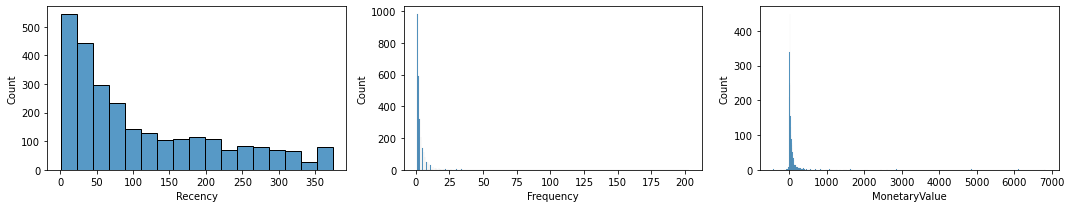

In [103]:
# Import library
import seaborn as sns
fig, ax = plt.subplots(1, 3, figsize=(15,3))
sns.histplot(customers['Recency'], ax=ax[0])
sns.histplot(customers['Frequency'], ax=ax[1])
sns.histplot(customers['MonetaryValue'], ax=ax[2])
plt.tight_layout()
plt.show()

As seen above, the data has to be transformed, so it has a more symmetrical form.
There are some methods that can be used to manage the skewness, they are,

- log transformation
- square root transformation
- box-cox transformation

Note: The transformation can only be used only if the variable has only positive values.

Below are the visualizations of each variable and with and without transformations. From top left clockwise on each variable shows the plot without transformation, log transformation, square root transformation, and box-cox transformation.

In [104]:
# Import library
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.histplot(customers[x], ax=ax[0,0])
    sns.histplot(np.log(customers[x]), ax=ax[0,1])
    sns.histplot(np.sqrt(customers[x]), ax=ax[1,0])
    sns.histplot(stats.boxcox(customers[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()
    
    print(customers[x].skew().round(2))
    print(np.log(customers[x]).skew().round(2))
    print(np.sqrt(customers[x]).skew().round(2))
    print(pd.Series(stats.boxcox(customers[x])[0]).skew().round(2))

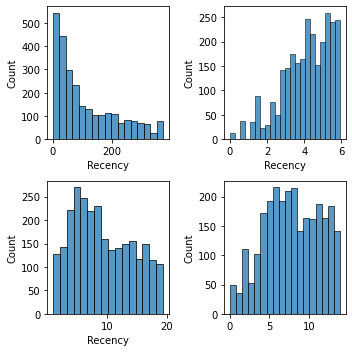

0.93
-0.72
0.32
-0.1


In [105]:
analyze_skewness('Recency')

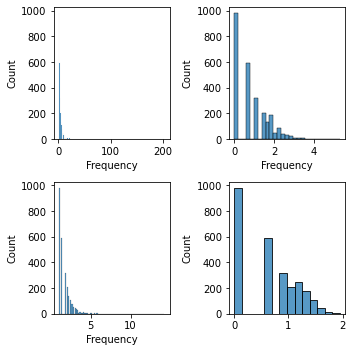

14.77
0.85
3.67
0.16


In [106]:
analyze_skewness('Frequency')

[(0.0, 420.0)]

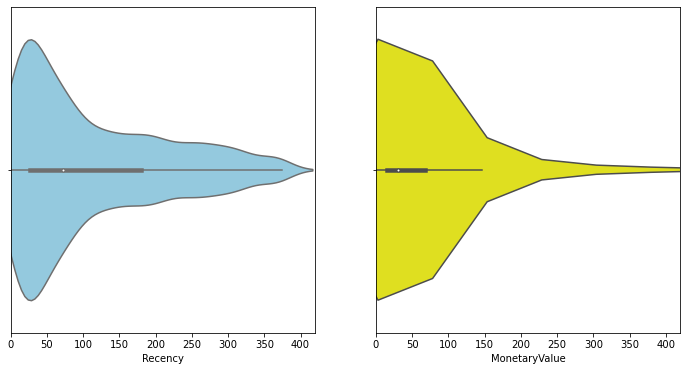

In [182]:
#Violin plot of Recency and MonetaryValue
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True)
v1 = sns.violinplot(data=customers, x='Recency', color="skyblue",ax=axes[0])
v2 = sns.violinplot(data=customers, x='MonetaryValue',color="yellow", ax=axes[1])
v1.set(xlim=(0,420))

[(0.0, 420.0)]

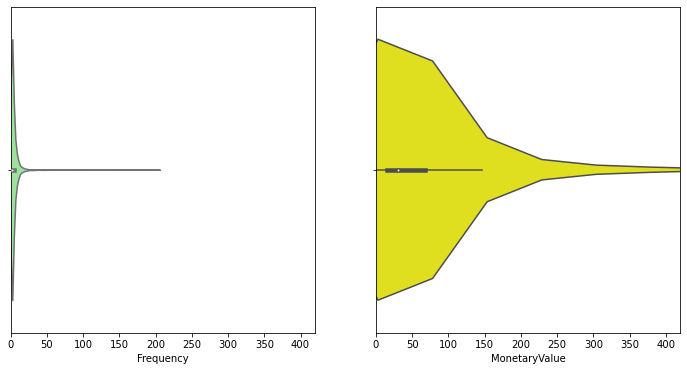

In [180]:
#Violin plot of Frequency and MonetaryValue
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True)
v1 = sns.violinplot(data=customers, x='Frequency',color="lightgreen", ax=axes[0])
v2 = sns.violinplot(data=customers, x='MonetaryValue',color="yellow", ax=axes[1])
v1.set(xlim=(0,420))

Here is how to interpret the skewness value. If the value is close to 0, the variable tend to have symmetrical 
form. However, if it’s not, the variable has skew on it.

Based on these visualizations, it shows that the variables with box-cox transformation shows a more symmetrical form rather than the other transformations. Hence the variables with box-cox transformations are used, except for the MonetaryValue variable because the variable includes negative values. To handle this variable, the cubic root transformation is used on the data, so the comparison looks like this, 

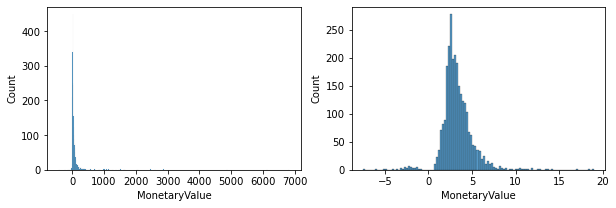

16.63
1.16


In [107]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))
sns.histplot(customers['MonetaryValue'], ax=ax[0])
sns.histplot(np.cbrt(customers['MonetaryValue']), ax=ax[1])
plt.show()
print(customers['MonetaryValue'].skew().round(2))
print(np.cbrt(customers['MonetaryValue']).skew().round(2))

In [108]:
pd.Series(np.cbrt(customers['MonetaryValue'])).values

array([ 5.10702607,  4.94445183,  6.78785317, ..., -1.66910753,
        4.27320639,  4.0872497 ])

By using the transformation, we will have data that are less skewed. The skewness value declines from 16.63 to 1.16. Therefore, the RFM table can be transformed using this code,

In [141]:
# Set the Numbers
# Import library
from scipy import stats
customers_new = pd.DataFrame()
customers_new["Recency"] = stats.boxcox(customers['Recency'])[0]
customers_new["Frequency"] = stats.boxcox(customers['Frequency'])[0]
customers_new["MonetaryValue"] = pd.Series(np.cbrt(customers['MonetaryValue'])).values
customers_new.tail()

,Recency,Frequency,MonetaryValue
2685,7.832068,0.591193,3.408514
2686,1.269495,1.435599,5.907565
2687,4.288385,0.591193,-1.669108
2688,1.665555,1.615329,4.273206
2689,6.340700,1.017445,4.087250


#### Centering and Scaling Variables

Looking at the plot once more, each variable don’t have the same mean and variance. Therefore it should be normalized. To normalize, it, the StandardScaler object from scikit-learn library can be used. The code will look like this,

In [142]:
# Import library
from sklearn.preprocessing import StandardScaler

# Initialize the Object
scaler = StandardScaler()

# Fit and Transform The Data
scaler.fit(customers_new)
customers_normalized = scaler.transform(customers_new)

# Assert that it has mean 0 and variance 1
print(customers_normalized.mean(axis = 0).round(2))
print(customers_normalized.std(axis = 0).round(2))

[ 0. -0. -0.]
[1. 1. 1.]


In [143]:
pd.DataFrame(customers_normalized).head()

,0,1,2
0,-0.493794,1.012426,1.017503
1,1.232949,-0.017412,0.925115
2,-0.994917,-0.017412,1.972690
3,-0.012582,1.012426,0.572565
4,1.155005,-0.017412,-0.056441


### Modelling
#### Choose k-number

Right after preprocessing the data, modelling can now be focused on to make segmentation from the data, the K-Means algorithm can be used to do this.

K-Means algorithm is an unsupervised learning algorithm that uses the geometrical principle to determine which cluster belongs to the data. By determining each centroid, the distance to each centroid is calculated. Each data belongs to a centroid if it has the smallest distance from the other. It repeats until the next total of the distance doesn’t have significant changes than before.

To implement K-Means in Python the KMeans function from scikit-learn can be used to do this.

To make clustering reach its maximum performance, the hyperparameter that fits to the data has to be determined. To determine which hyperparameter is the best for the model and data, the elbow method can be used to decide. The code will look like this,

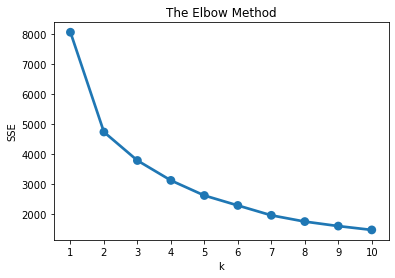

In [144]:
# Import library
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

**Interpreting the plot:**

The x-axis is the value of the k, and the y-axis is the SSE value of the data. Taking the best parameter by looking at where the k-value will have a linear trend on the next consecutive k.
Based on observation, the k-value of 3 is the best hyperparameter for the model because the next k-value tend to have a linear trend. Therefore, the best model for the data is K-Means with the number of clusters as 3.

Now, the model can be fitted with this code,

In [145]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(customers_normalized)
model.labels_.shape

(2690,)

In [146]:
customers.shape

(2690, 3)

By fitting the model, clusters can be grouped where each data belongs. By that, the data can be analyzed.


### Interpreting The Segment
The RFM table can be summarised based on clusters and the mean of each variable calculated. The code will look like this,


### Cluster Analysis

In [150]:
customers["Cluster"] = model.labels_
customers.head()

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12347.0,40,5,133.20,0
12348.0,249,2,120.88,2
12349.0,19,2,312.75,0
12352.0,73,5,80.85,0
12354.0,233,2,33.30,2


In [159]:
customers.groupby('Cluster').agg({
    'Recency':'sum',
    'Frequency':'sum',
    'MonetaryValue':['sum', 'count']}).round(1)

Recency Frequency MonetaryValue      
            sum       sum           sum count
Cluster                                      
0         42731      7123      153194.2   924
1         38616      1307       17446.0   811
2        217066      1570       27413.1   955

In [160]:
customers.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          46.2       7.7         165.8   924
1          47.6       1.6          21.5   811
2         227.3       1.6          28.7   955

### Snake Plots

Besides that, the segments can be analyzed using snake plot. It requires the normalized dataset and also the cluster labels. By using this plot, A good visualization from the data on how the cluster differs from each other can be seen. The plot can be made using this code,


In [161]:
# Create the dataframe
df_normalized = pd.DataFrame(customers_normalized, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = customers.index
df_normalized['Cluster'] = model.labels_
df_normalized.head()

,Recency,Frequency,MonetaryValue,ID,Cluster
0,-0.493794,1.012426,1.017503,12347.0,0
1,1.232949,-0.017412,0.925115,12348.0,2
2,-0.994917,-0.017412,1.972690,12349.0,0
3,-0.012582,1.012426,0.572565,12352.0,0
4,1.155005,-0.017412,-0.056441,12354.0,2


In [162]:
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Frequency','MonetaryValue','Recency'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()

,ID,Cluster,Attribute,Value
0,12347.0,0,Frequency,1.012426
1,12348.0,2,Frequency,-0.017412
2,12349.0,0,Frequency,-0.017412
3,12352.0,0,Frequency,1.012426
4,12354.0,2,Frequency,-0.017412


<AxesSubplot:xlabel='Attribute', ylabel='Value'>

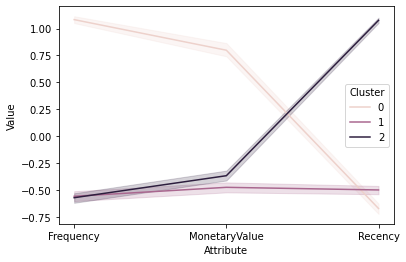

In [163]:
# import warnings filter
from warnings import simplefilter

# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Visualize it
sns.lineplot('Attribute', 'Value', hue='Cluster', data=df_nor_melt)

By using this plot, it is known how each segment differs. It describes more than the summarized table.

It can therefore be infered that cluster 0 is frequent, spend more, and they buy the product recently. Therefore, it could be the cluster of a loyal customer.

Then, the cluster 1 is less frequent, less to spend, but they buy the product recently. Therefore, it could be the cluster of new customer.

Finally, the cluster 2 is less frequent, less to spend, and they buy the product at the old time. Therefore, it could be the cluster of churned customers.

In [164]:
customers.groupby('Cluster').agg({
    'Recency':'sum',
    'Frequency':'sum',
    'MonetaryValue':['sum', 'count']}).round()

Recency Frequency MonetaryValue      
            sum       sum           sum count
Cluster                                      
0         42731      7123      153194.0   924
1         38616      1307       17446.0   811
2        217066      1570       27413.0   955

In [165]:
customers.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          46.2       7.7         165.8   924
1          47.6       1.6          21.5   811
2         227.3       1.6          28.7   955

In [167]:
cluster_sum = customers.groupby('Cluster').sum()
population_sum = customers.sum()
relative_sum = cluster_sum / population_sum - 1
relative_sum

,Cluster,Frequency,MonetaryValue,Recency
Cluster,,,,
0,NaN,-0.2877,-0.226500,-0.856806
1,NaN,-0.8693,-0.911913,-0.870595
2,NaN,-0.8430,-0.861587,-0.272599


In [168]:
cluster_avg = customers.groupby('Cluster').mean()
population_avg = customers.mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp

,Cluster,Frequency,MonetaryValue,Recency
Cluster,,,,
0,NaN,1.073687,1.251856,-0.583125
1,NaN,-0.566482,-0.707823,-0.570779
2,NaN,-0.557770,-0.610126,1.048910


## Conclusion

In conclusion, customer segmentation is really necessary for knowing what characteristics that exist on each customer and allows the vendor to more precisely reach a customer or prospect based on their specific needs and wants. 

Segmentation will allow vendors to: 
Better identify their most valuable customer segments. Improve their returns on marketing investment by only targeting those likely to be their best customers.

By segmenting your customers, you can create highly efficient and effective customer experience strategies that truly connect with your customers. 

A one-size-fits-all approach to customer-business interaction is no longer appropriate for such a fast-paced and highly customized modern world, so customer segmentation is becoming a must. 

By understanding your customers and their buying behaviors, you’re better able to offer them what they want and as such leave them with a more positive experience with your company.